In [1]:
# Importation des librairies utilisées
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
# Importation du fichier csv formaté
df = pd.read_csv("Completed_NBA_Draft.csv")

In [3]:
# Suppression de la colonne index ajoutée lors de la sauvegarde
df.drop("Unnamed: 0", inplace = True, axis = 1)

In [4]:
df.head()

,ID,Player Name,Drafting Team,Franchise current name,NBA profile,College / High School,Age at Draft,League before Draft,Draft Year,Pick Number,...,CO APG,CO SPG,CO BPG,CO TOPG,MVP Awards,All-NBA Selections,All-Defensive Selections,Finals MVP Awards,Hall of Fame Inductee,Reason no stats
0,1,Bob Lanier,Detroit Pistons,Detroit Pistons,/stats/player/600005/,St. Bonaventure,21.8,College,1970,1,...,NaN,NaN,NaN,NaN,0,0,0,0,1,Too many results
1,2,Rudy Tomjanovich,San Diego Rockets,Houston Rockets,/stats/player/78350/,Michigan,21.6,College,1970,2,...,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN
2,3,Pete Maravich,Atlanta Hawks,Atlanta Hawks,/stats/player/77459/,Louisiana State,23.0,College,1970,3,...,6.2,NaN,NaN,NaN,0,4,0,0,1,NaN
3,4,Dave Cowens,Boston Celtics,Boston Celtics,/stats/player/76462/,Florida State,21.7,College,1970,4,...,NaN,NaN,NaN,NaN,1,3,3,0,1,NaN
4,5,Sam Lacey,Cincinnati Royals,Sacramento Kings,/stats/player/77326/,New Mexico State,22.3,College,1970,5,...,1.2,NaN,NaN,NaN,0,0,0,0,0,NaN


<AxesSubplot:xlabel='Height'>

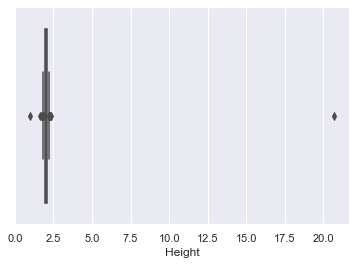

In [5]:
# Aperçu de la distribution de la taille
sns.set_theme(style="darkgrid")
sns.boxplot(x = df["Height"])

          Player Name  Height
1882  Marcus Williams    20.7


<AxesSubplot:xlabel='Height'>

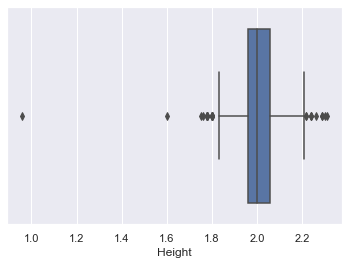

In [6]:
# La visualisation est tronquée par la présence d'une valeur aberrante qui nécessite correction
print(df[["Player Name", "Height"]][df["Height"] > 2.5])
# Effectivement, Marcus Williams est indiqué comme faisant plus de 20 mètres, correction par sa vraie taille
df.at[1882, "Height"] = 2.07
# Vérification du boxplot
sns.boxplot(x = df["Height"])

       Player Name  Height
2477  Jordan Poole    0.96


<AxesSubplot:xlabel='Height'>

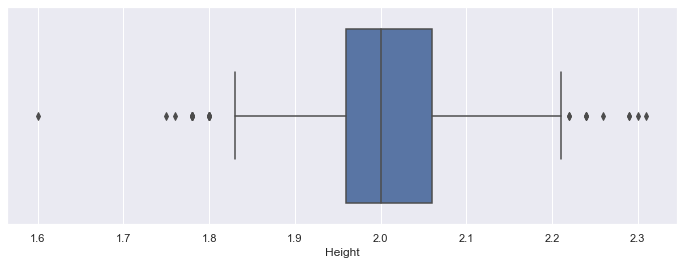

In [7]:
# Présence d'une autre valeur aberrante cette fois-ci dans le minimum qui était difficile à remarquer sur le précédent graphique
print(df[["Player Name", "Height"]][df["Height"] < 1.0])
# Comme avant, on a bien une erreur avec Jordan Poole qui ferait 96cm, correction par sa vraie taille
df.at[2477, "Height"] = 1.96
# Vérification du boxplot
plt.figure(figsize=(12, 4))
sns.boxplot(x = df["Height"])

In [8]:
# Même si l'écart est assez important, on remarque que la moitié des joueurs font entre 1.96 et 2.06m
print(df[["Player Name", "Height"]][df["Height"] == df["Height"].min()])
print(df[["Player Name", "Height"]][df["Height"] == df["Height"].max()])
print("Taille moyenne des joueurs draftés en NBA : {}m".format(round(df["Height"].mean(), 2)))

       Player Name  Height
861  Muggsy Bogues     1.6
           Player Name  Height
1179  Gheorghe Muresan    2.31
Taille moyenne des joueurs draftés en NBA : 2.0m


<AxesSubplot:xlabel='Weight'>

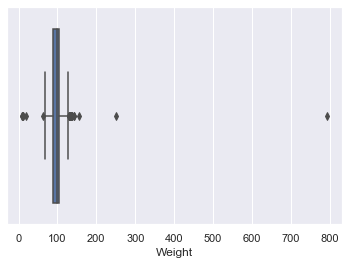

In [9]:
# Aperçu de la distribution du poids
sns.boxplot(x = df["Weight"])

       Player Name  Weight
78   Isaiah Wilson   792.0
901      Rik Smits   250.0


<AxesSubplot:xlabel='Weight'>

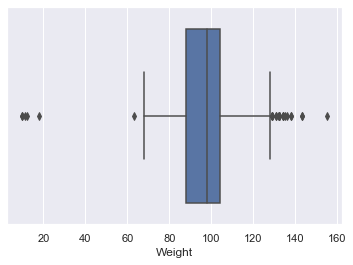

In [10]:
# Là aussi, valeurs aberrantes qui nécessitent correction
print(df[["Player Name", "Weight"]][df["Weight"] > 200])
df.at[78, "Weight"] = 79.0
df.at[901, "Weight"] = 113.0
# Vérification du boxplot
sns.boxplot(x = df["Weight"])

           Player Name  Weight
946     Vernon Maxwell    18.0
2297    Dakari Johnson    12.0
2381        Davon Reed    10.0
2391     Thomas Bryant    11.0
2479  Kevin Porter Jr.    10.0


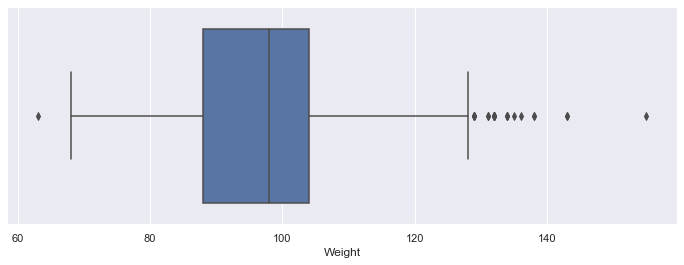

In [11]:
# Valeurs aberrantes vers le minimum qui nécessitent correction
print(df[["Player Name", "Weight"]][df["Weight"] < 60])
df.at[946, "Weight"] = 82.0
df.at[2297, "Weight"] = 120.0
df.at[2381, "Weight"] = 100.0
df.at[2391, "Weight"] = 111.0
df.at[2479, "Weight"] = 100.0
# Vérification du boxplot
plt.figure(figsize=(12, 4))
ax = sns.boxplot(x = df["Weight"])

In [12]:
# Même si l'écart est assez important, on remarque que la moitié des joueurs font entre 88 et 104kg
print(df[["Player Name", "Weight"]][df["Weight"] == df["Weight"].min()])
print(df[["Player Name", "Weight"]][df["Weight"] == df["Weight"].max()])
print("Poids moyen des joueurs draftés en NBA : {}kg".format(round(df["Weight"].mean(), 0)))

       Player Name  Weight
861  Muggsy Bogues    63.0
            Player Name  Weight
1327  Priest Lauderdale   155.0
Poids moyen des joueurs draftés en NBA : 97.0kg


Text(0.5, 1.0, 'Evolution du poids moyen des joueurs draftés année par année')

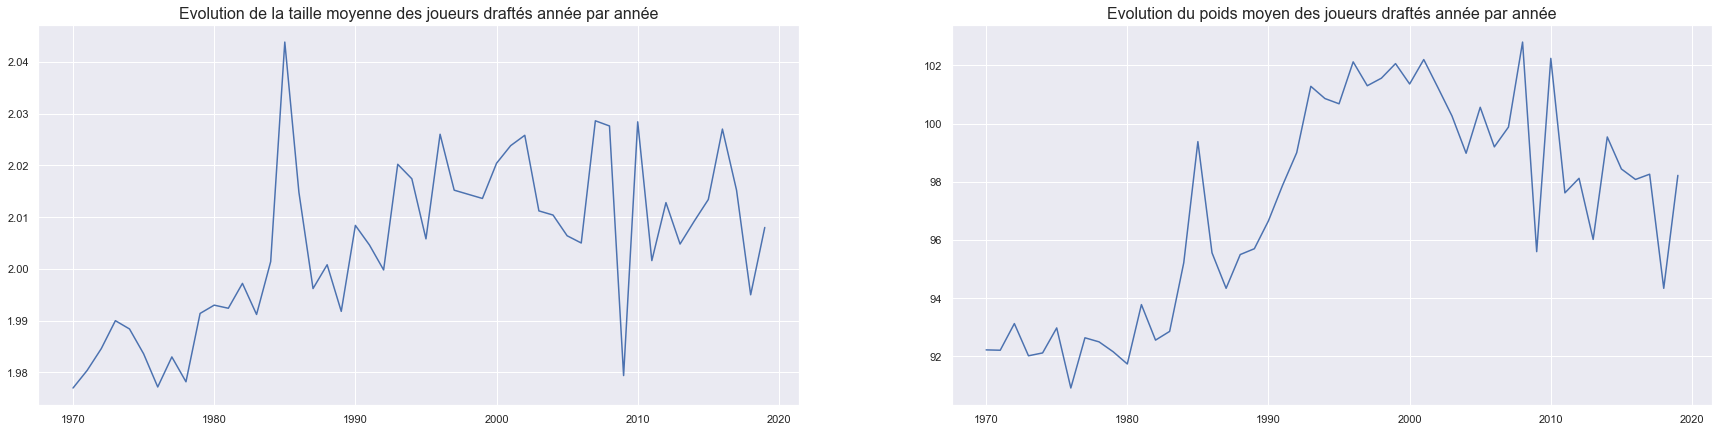

In [13]:
# Evolution de la taille et du poids moyen au fil des années
plt.figure(figsize=(30, 7))
plt.subplot(1, 2, 1)
height = df[["Draft Year", "Height"]]
plt.plot(height.groupby("Draft Year").mean())
plt.title("Evolution de la taille moyenne des joueurs draftés année par année", fontsize = 16)


plt.subplot(1, 2, 2)
weight = df[["Draft Year", "Weight"]]
plt.plot(weight.groupby("Draft Year").mean())
plt.title("Evolution du poids moyen des joueurs draftés année par année", fontsize = 16)


In [14]:
# Sur un petit échantillon de 50 joueurs, grosse variation d'une année sur l'autre. Tentative de lissage de la courbe en prenant la moyenne sur 5 ans.
# Creating new dfs with 5 and 10 years spans
r1970 = range(1970, 1975)
r1975 = range(1975, 1980)
r1980 = range(1980, 1985)
r1985 = range(1985, 1990)
r1990 = range(1990, 1995)
r1995 = range(1995, 2000)
r2000 = range(2000, 2005)
r2005 = range(2005, 2010)
r2010 = range(2010, 2015)
r2015 = range(2015, 2020)

# 5 years span
draft1970 = df[df["Draft Year"].isin(r1970)]
five1970 = ["1970-1974"] * draft1970["ID"].count()
draft1970.at[:, "Draft Year"] = five1970
draft1975 = df[df["Draft Year"].isin(r1975)]
five1975 = ["1975-1979"] * draft1975["ID"].count()
draft1975.at[:, "Draft Year"] = five1975
draft1980 = df[df["Draft Year"].isin(r1980)]
five1980 = ["1980-1984"] * draft1980["ID"].count()
draft1980.at[:, "Draft Year"] = five1980
draft1985 = df[df["Draft Year"].isin(r1985)]
five1985 = ["1985-1989"] * draft1985["ID"].count()
draft1985.at[:, "Draft Year"] = five1985
draft1990 = df[df["Draft Year"].isin(r1990)]
five1990 = ["1990-1994"] * draft1990["ID"].count()
draft1990.at[:, "Draft Year"] = five1990
draft1995 = df[df["Draft Year"].isin(r1995)]
five1995 = ["1995-1999"] * draft1995["ID"].count()
draft1995.at[:, "Draft Year"] = five1995
draft2000 = df[df["Draft Year"].isin(r2000)]
five2000 = ["2000-2004"] * draft2000["ID"].count()
draft2000.at[:, "Draft Year"] = five2000
draft2005 = df[df["Draft Year"].isin(r2005)]
five2005 = ["2005-2009"] * draft2005["ID"].count()
draft2005.at[:, "Draft Year"] = five2005
draft2010 = df[df["Draft Year"].isin(r2010)]
five2010 = ["2010-2014"] * draft2010["ID"].count()
draft2010.at[:, "Draft Year"] = five2010
draft2015 = df[df["Draft Year"].isin(r2015)]
five2015 = ["2015-2019"] * draft2015["ID"].count()
draft2015.at[:, "Draft Year"] = five2015

df_5y = pd.concat([draft1970, draft1975, draft1980, draft1985, draft1990, draft1995, draft2000, draft2005, draft2010, draft2015])

# 10 years span
draft70s = pd.concat([draft1970, draft1975])
decade70 = ["1970-1979"] * draft70s["ID"].count()
draft70s.at[:, "Draft Year"] = decade70
draft80s = pd.concat([draft1980, draft1985])
decade80 = ["1980-1989"] * draft80s["ID"].count()
draft80s.at[:, "Draft Year"] = decade80
draft90s = pd.concat([draft1990, draft1995])
decade90 = ["1990-1999"] * draft90s["ID"].count()
draft90s.at[:, "Draft Year"] = decade90
draft00s = pd.concat([draft2000, draft2005])
decade00 = ["2000-2009"] * draft00s["ID"].count()
draft00s.at[:, "Draft Year"] = decade00
draft10s = pd.concat([draft2010, draft2015])
decade10 = ["2010-2019"] * draft10s["ID"].count()
draft10s.at[:, "Draft Year"] = decade10

df_decade = pd.concat([draft70s, draft80s, draft90s, draft00s, draft10s])

C:\Users\Khryos\miniconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


(90.0, 102.0)

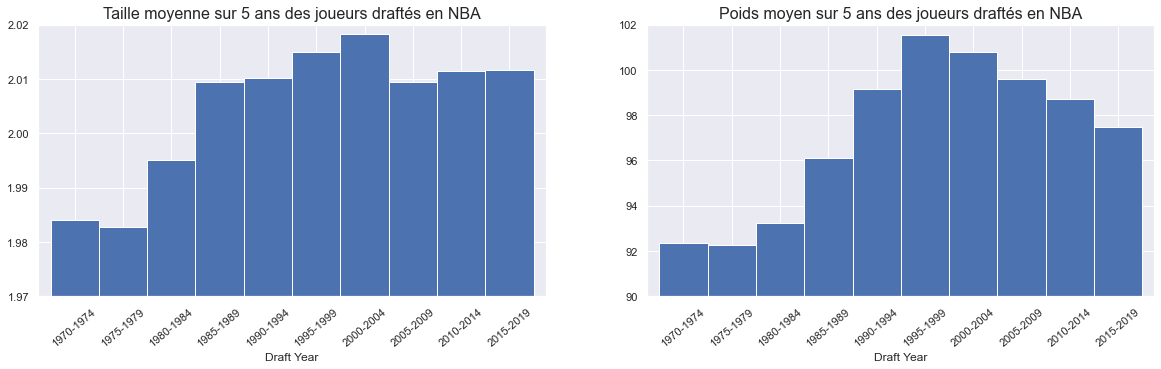

In [15]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
df_5y.groupby("Draft Year")["Height"].mean().plot(kind="bar", width=1)
plt.title("Taille moyenne sur 5 ans des joueurs draftés en NBA", fontsize = 16)
plt.xticks(rotation = 40)
plt.ylim(1.97, 2.02)

plt.subplot(1, 2, 2)
df_5y.groupby("Draft Year")["Weight"].mean().plot(kind="bar", width=1)
plt.title("Poids moyen sur 5 ans des joueurs draftés en NBA", fontsize = 16)
plt.xticks(rotation = 40)
plt.ylim(90, 102)

<Figure size 2160x720 with 0 Axes>

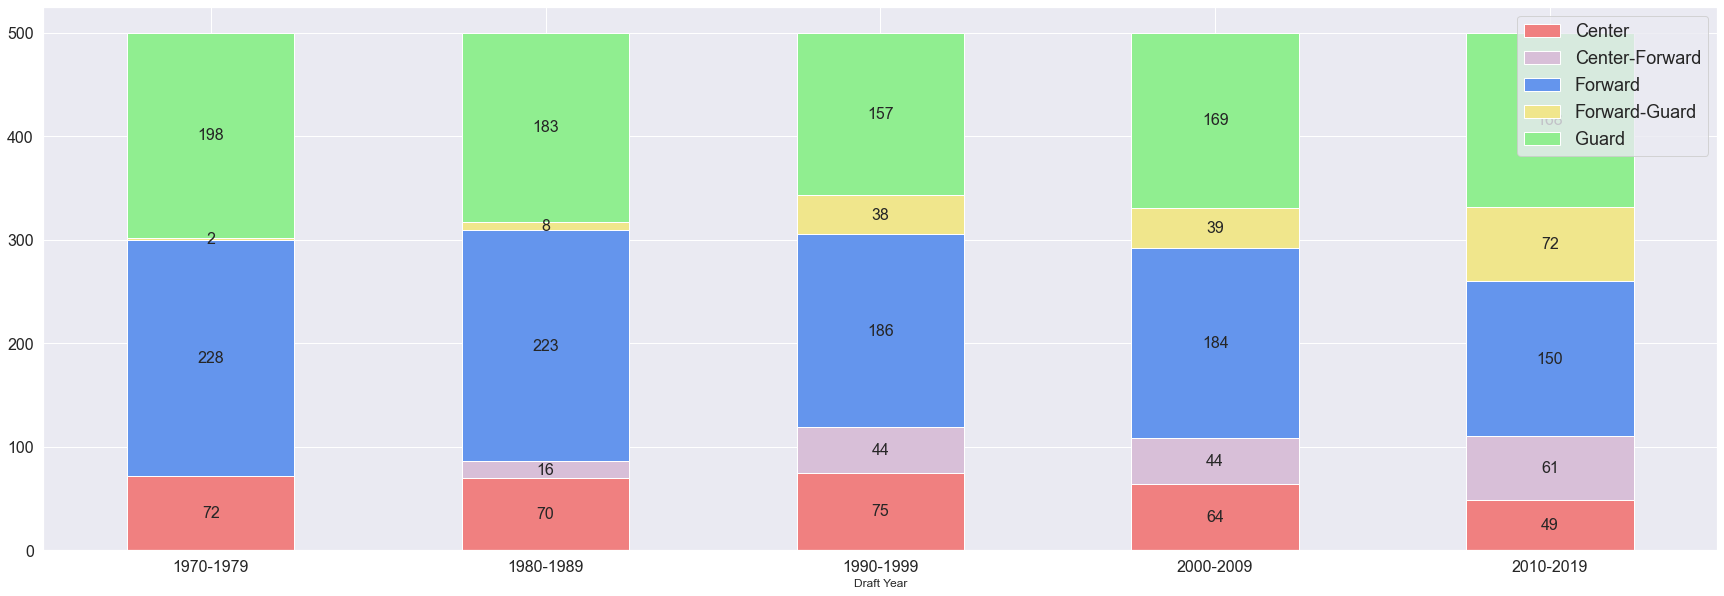

In [16]:
df_plot = df_decade.groupby(["Draft Year", "Position"]).size().reset_index().pivot(columns = "Position", index = "Draft Year", values=0)
plt.figure(figsize=(30, 10))
colors = {"Center" : "lightcoral", "Forward" : "cornflowerblue", "Guard" : "lightgreen", "Center-Forward" : "thistle", "Forward-Guard": "khaki"}
ax = df_plot.plot(kind="bar", stacked=True, figsize=(30, 10), color=colors, fontsize=16)
# Adding corresponding numbers to each rectangle
# Getting the position of each rectangle
for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # Height of bar equals the data value and can therefore be used as the label
    label_text = int(height)
    # Centering the label
    label_x = x + width/2
    label_y = y + height/2
    # Plot only when the value is > 0
    if height > 0:
        ax.text(label_x, label_y, label_text, ha="center", va="center", fontsize=16)
    
plt.legend(prop={'size': 18})
plt.xticks(rotation=0)
plt.show()

(20.0, 23.0)

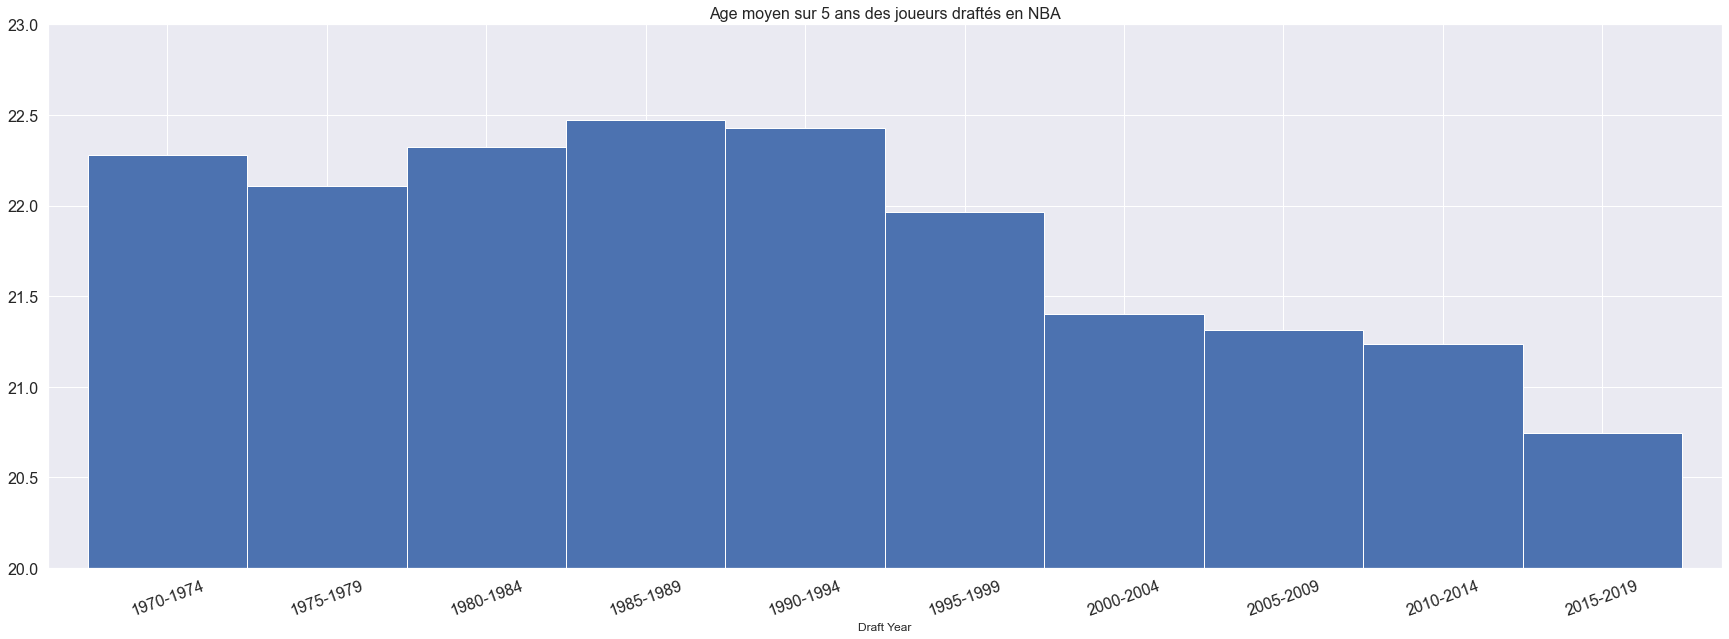

In [17]:
plt.figure(figsize=(30, 10))
df_5y.groupby("Draft Year")["Age at Draft"].mean().plot(kind="bar", width=1)
plt.title("Age moyen sur 5 ans des joueurs draftés en NBA", fontsize = 16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(rotation = 20)
plt.ylim(20, 23)

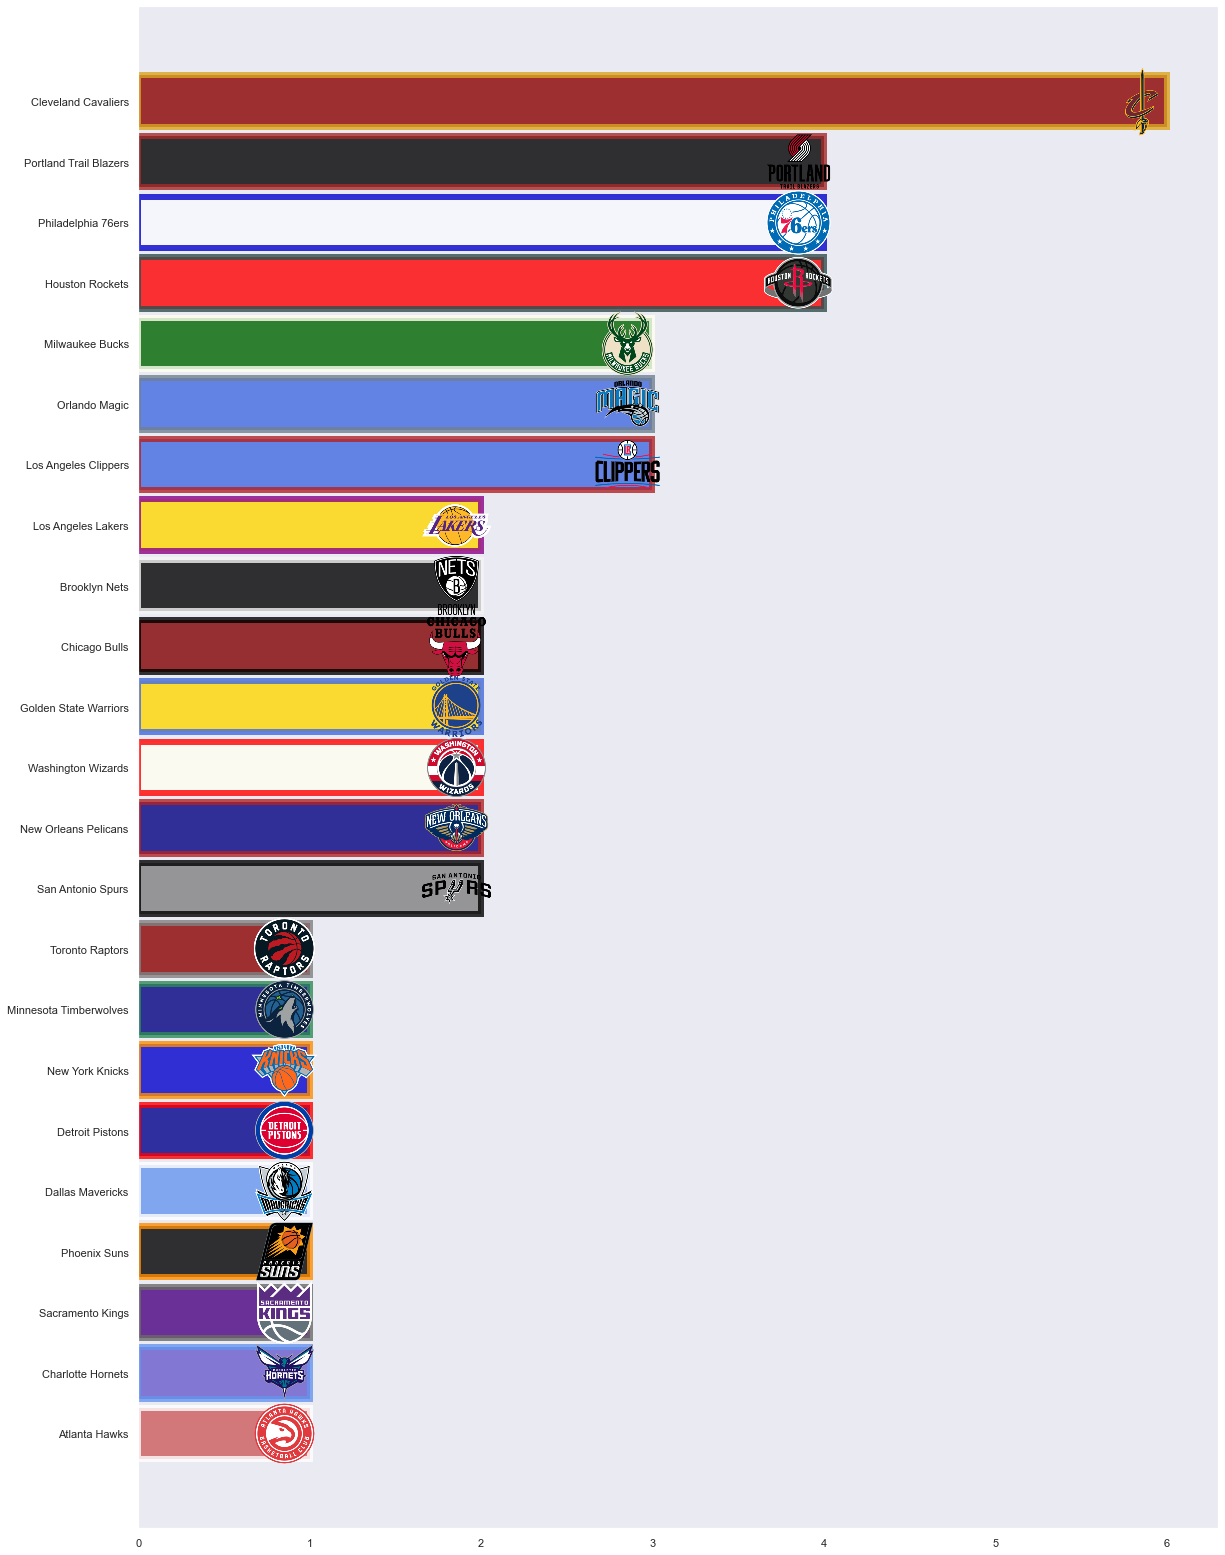

In [30]:
first_pick = df[df["Pick Number"] == 1]
first_pick = first_pick.groupby("Franchise current name")["Pick Number"].count().sort_values(ascending=True)
first_pick = first_pick.reset_index()
first_pick = first_pick.to_numpy()

team_colors = [["Atlanta Hawks", "indianred", "white"], ["Boston Celtics", "limegreen", "white"], ["Brooklyn Nets", "black", "whitesmoke"], ["Charlotte Hornets", "slateblue", "cornflowerblue"], ["Chicago Bulls", "maroon", "black"], ["Cleveland Cavaliers", "darkred", "goldenrod"], ["Dallas Mavericks", "cornflowerblue", "white"], ["Denver Nuggets", "midnightblue", "gold"], ["Detroit Pistons", "darkblue", "red"], ["Golden State Warriors", "gold", "royalblue"], ["Houston Rockets", "red", "darkslategray"], ["Indiana Pacers", "darkblue", "gold"], ["Los Angeles Clippers", "royalblue", "firebrick"], ["Los Angeles Lakers", "gold", "darkmagenta"], ["Memphis Grizzlies", "darkblue", "cornflowerblue"], ["Miami Heat", "darkred", "darkorange"], ["Milwaukee Bucks", "darkgreen", "ivory"], ["Minnesota Timberwolves", "navy", "seagreen"], ["New Orleans Pelicans", "navy", "firebrick"], ["New York Knicks", "mediumblue", "darkorange"], ["Oklahoma City Thunder", "dodgerblue", "orangered"], ["Orlando Magic", "royalblue", "slategray"], ["Philadelphia 76ers", "ghostwhite", "mediumblue"], ["Phoenix Suns", "black", "darkorange"], ["Portland Trail Blazers", "black", "brown"], ["Sacramento Kings", "indigo", "dimgray"], ["San Antonio Spurs", "gray", "black"], ["Toronto Raptors", "darkred", "grey"], ["Utah Jazz", "navy", "gold"], ["Washington Wizards", "ivory", "red"]]

def pos_logo(x, y, team, ax):
    file = "C:/Users/Khryos/Documents/DATA/Projets/Draft_NBA"
    file += "/{}.png".format(team)
    logo = mpimg.imread(file)
    img = OffsetImage(logo, zoom=0.25)
    img.image.axes = ax
    x_offset = -25
    ab = AnnotationBbox(img, (x, y), xybox=(x_offset, 0), frameon=False, xycoords="data", boxcoords="offset points", pad=0)
    ax.add_artist(ab)
    
labels = [i[0] for i in first_pick]
values = [i[1] for i in first_pick]

bars_color = []
edges_color = []

for label in labels:
    for teams in team_colors:
        if label == teams[0]:
            bars_color.append(teams[1])
            edges_color.append(teams[2])

sns.set_style("dark")
height= 0.85
plt.figure(figsize=(20, 28))
plt.barh(y=labels, width=values, height=height, align="center", linewidth = 6, color=bars_color, edgecolor=edges_color, alpha = 0.8)


for i, (label, value) in enumerate(zip(labels, values)):
    pos_logo(value, i, label, ax=plt.gca())
plt.subplots_adjust(left = 0.15)
plt.show()

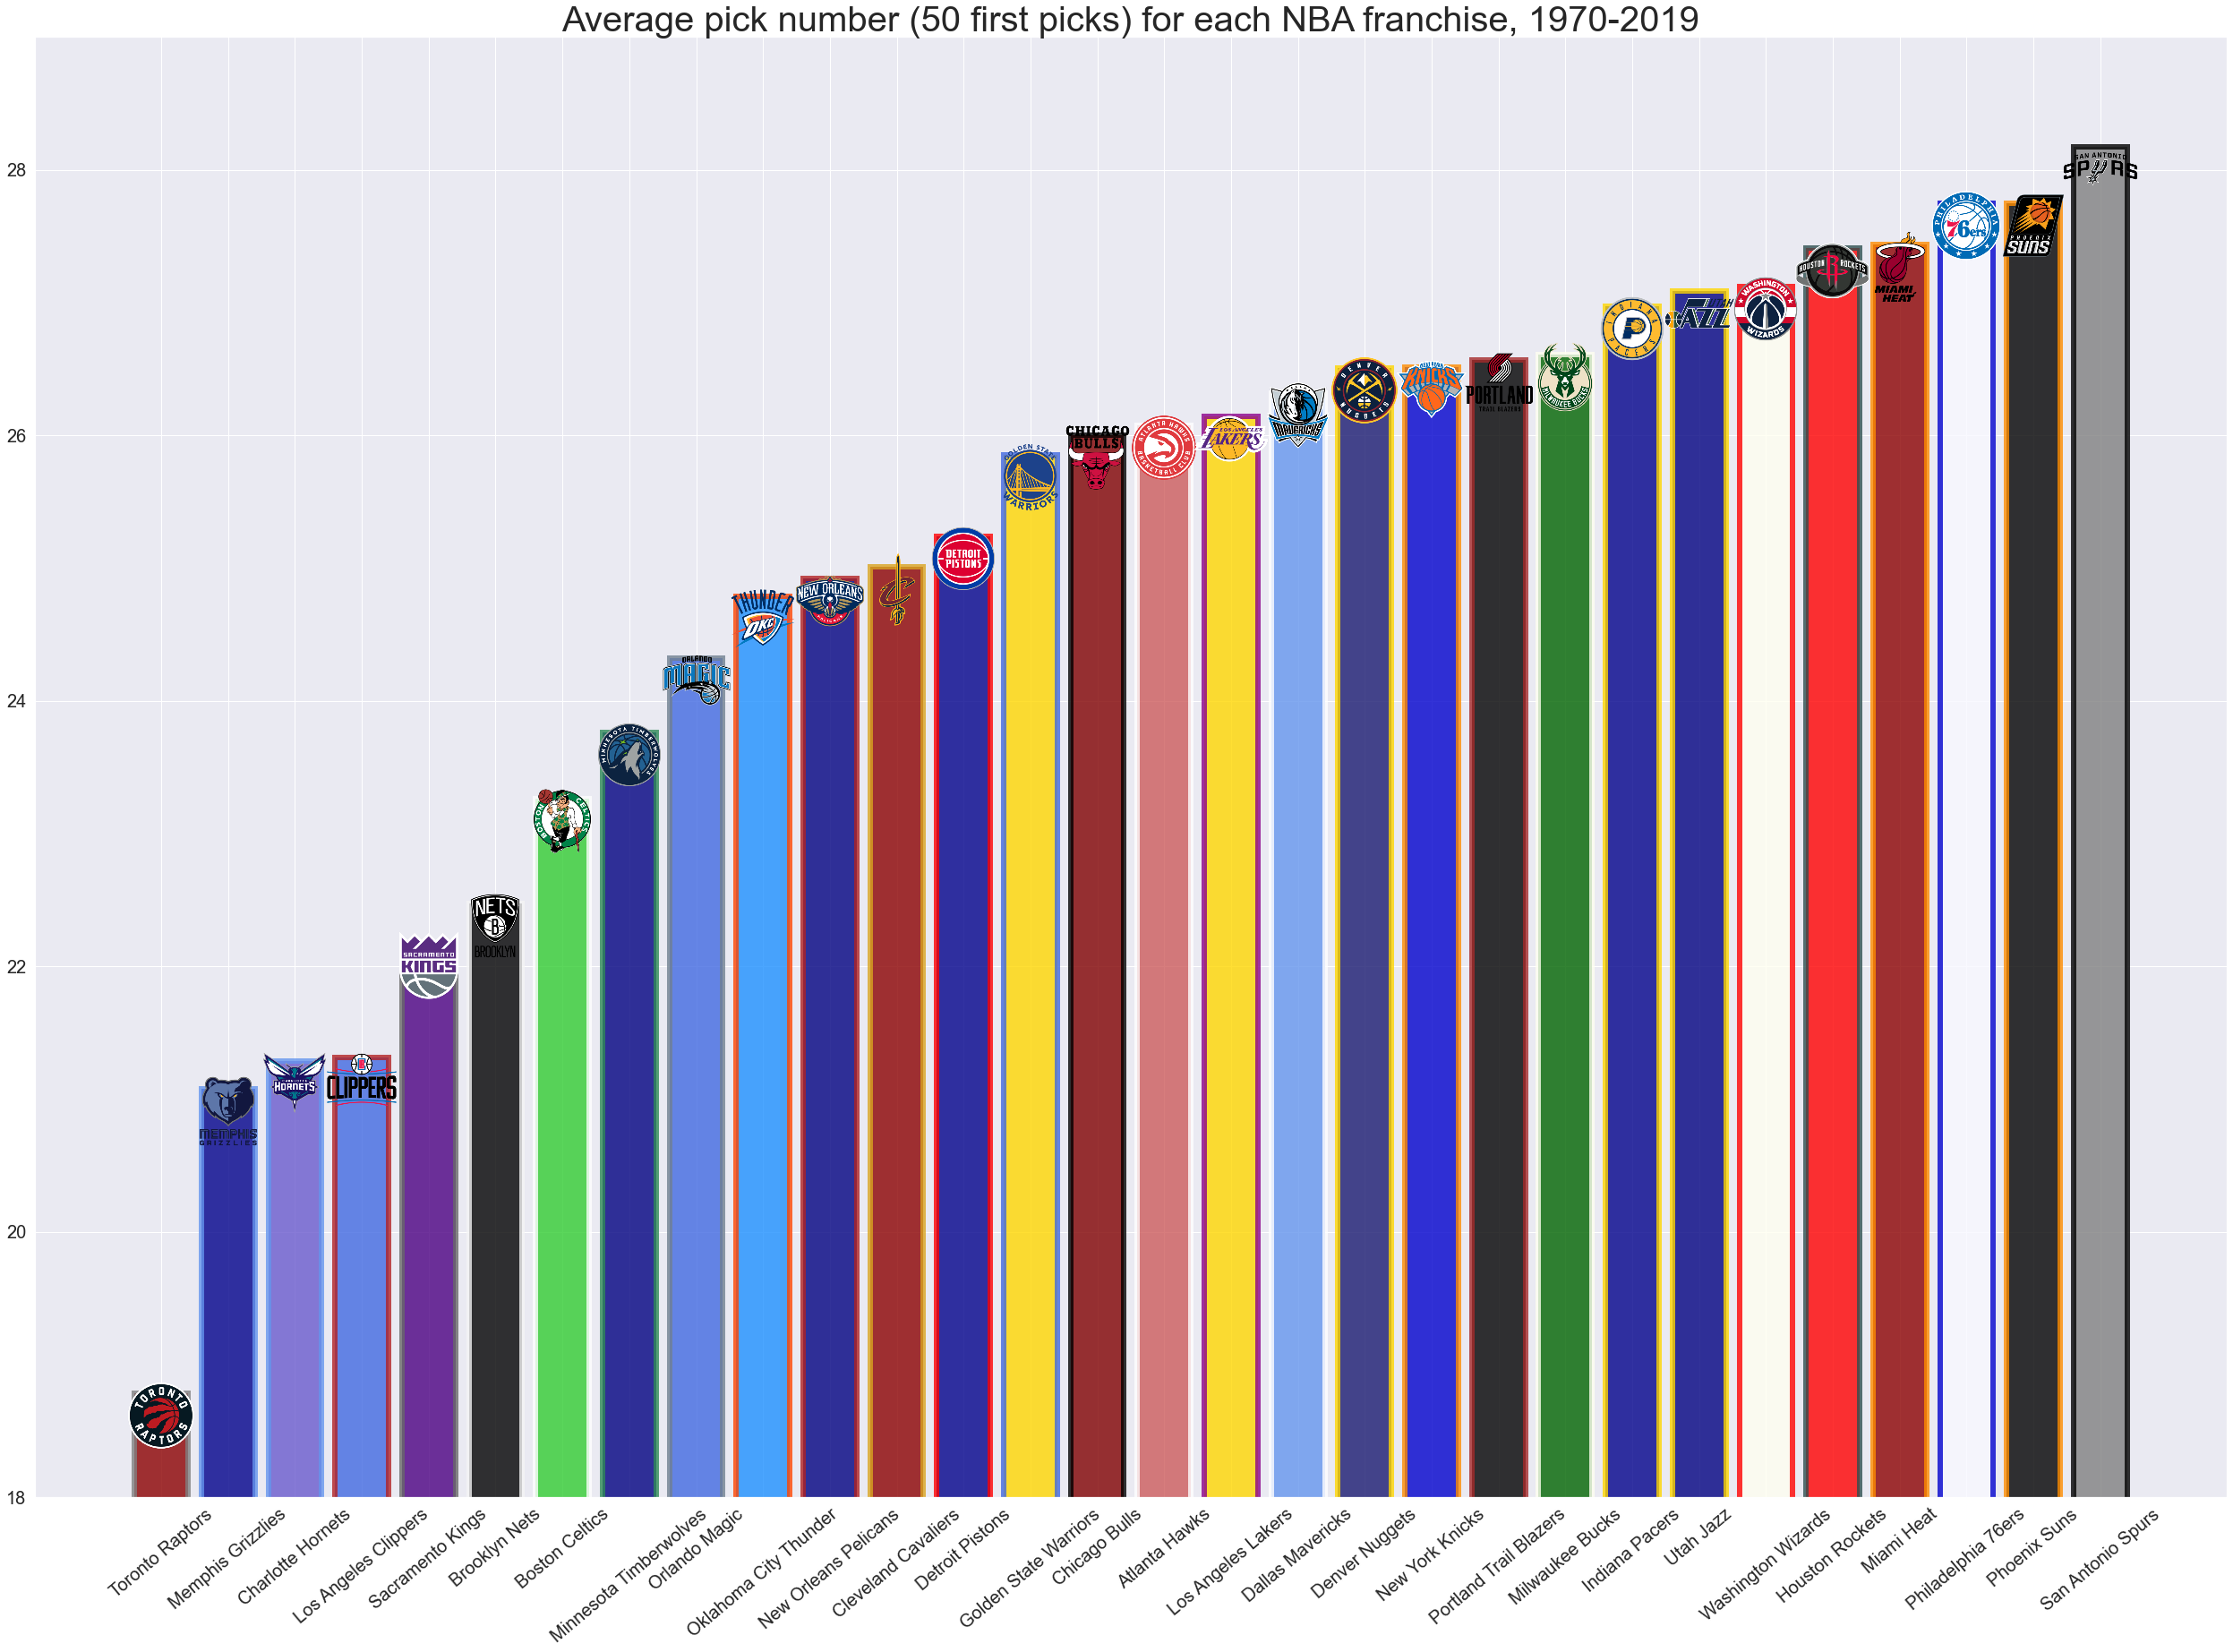

In [51]:
avg_pick = df.groupby("Franchise current name")["Pick Number"].mean().sort_values(ascending=True)
avg_pick =avg_pick.reset_index()
avg_pick = avg_pick.to_numpy()

def pos_logo(x, y, team, ax):
    file = "C:/Users/Khryos/Documents/DATA/Projets/Draft_NBA"
    file += "/{}.png".format(team)
    logo = mpimg.imread(file)
    img = OffsetImage(logo, zoom=0.3)
    img.image.axes = ax
    y_offset = -25
    ab = AnnotationBbox(img, (x, y), xybox=(0, y_offset), frameon=False, xycoords="data", boxcoords="offset points", pad=0)
    ax.add_artist(ab)

labels = [i[0] for i in avg_pick]
values = [i[1] for i in avg_pick]

bars_color = []
edges_color = []

for label in labels:
    for teams in team_colors:
        if label == teams[0]:
            bars_color.append(teams[1])
            edges_color.append(teams[2])

sns.set_style("darkgrid")
plt.figure(figsize=(40, 30))
plt.bar(x=labels, height=values, width=0.8, align="center", linewidth = 6, color=bars_color, edgecolor=edges_color, alpha = 0.8)


for i, (label, value) in enumerate(zip(labels, values)):
    pos_logo(i, value, label, ax=plt.gca())
plt.subplots_adjust(left = 0.05)
plt.ylim(18, 29)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20, rotation=40)
plt.title("Average pick number (50 first picks) for each NBA franchise, 1970-2019", fontsize=40)
plt.show()